In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
import env 
import acquire
import prepare
import model
import split_scale

# MVP 
## Predictions made with Decision Tree

### Aquire
Bringing the data from the MySQL DB

In [3]:
raw_df = acquire.get_telco_chunk()

Data is a table of customer info. 

Most variables are categories about the customer's demographics and their services acquired.

Only continous variables are the tenure, monthly and total charges

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
internet_service_type_id    7043 non-null int64
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
contract_type_id            7043 non-null int64
paperless_billing           7043 non-null object
payment_type_id             7043 non-null int64
monthly_charges 

### Prepare
Converting the 'object' categories into Label-Encoded categories

In [5]:
df = prepare.prep_telco()

Prepare module gets rid of nulls and makes columns conform to Pandas friendly dtypes

In [6]:
# # Use a label encoder to transform the embarked column.
def encode_variable(column, df):
    lab_enc = LabelEncoder()
    lab_enc.fit(df[column])
    df[column] = lab_enc.transform(df[column])

In [7]:
cat_cols = df.select_dtypes('object').columns
for i in cat_cols:
    encode_variable(i, df)

All categorical variables are now in a numerical encoding for each category

In [8]:
# df.info()
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
customer_id,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,9,1,0,1,0,2,0,2,2,0,2,1,2,65.6,593.30,0
0003-MKNFE,1,0,0,0,9,1,2,1,0,0,0,0,0,2,1,0,2,59.9,542.40,0
0004-TLHLJ,1,0,0,0,4,1,0,2,0,0,2,0,0,0,1,1,1,73.9,280.85,1
0011-IGKFF,1,1,1,0,13,1,0,2,0,2,2,0,2,2,1,1,1,98.0,1237.85,1
0013-EXCHZ,0,1,1,0,3,1,0,2,0,0,0,2,2,0,1,1,2,83.9,267.40,1


#### MVP will use all the features in X

In [9]:
X = df.drop('churn',axis=1)
y = df['churn']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [11]:
X_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges
customer_id,,,,,,,,,,,,,,,,,,,
2187-PKZAY,1,0,0,0,12,1,0,2,0,0,0,0,0,2,1,1,3,79.95,1043.40
3402-XRIUO,0,1,1,0,22,1,2,1,2,2,0,2,0,0,1,1,2,63.55,1381.80
9397-TZSHA,0,0,0,0,69,1,2,3,1,1,1,1,1,1,3,0,4,24.60,1678.05
9153-BTBVV,0,0,1,0,71,1,2,3,1,1,1,1,1,1,3,0,3,25.00,1753.00
3793-MMFUH,0,1,0,0,13,1,2,2,0,0,0,0,2,2,1,1,1,95.05,1290.00


### Model

In [13]:
y_pred, y_pred_proba = model.do_the_decisionTree('gini', X_train, y_train)

The accuracy score is 0.7835699797160244. 


In [14]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3628
           1       0.63      0.44      0.52      1302

    accuracy                           0.78      4930
   macro avg       0.72      0.67      0.69      4930
weighted avg       0.77      0.78      0.77      4930



The accuracy is .783, which is just .04 better than if we predicted every customer would churn.

This model is better at finding customers that will remain than ones that will churn. It would be more helpful
to have better results in finding the likely-to-churn customers.

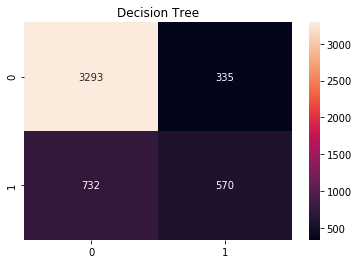

In [15]:
decision_tree_conf_matrix = metrics.confusion_matrix(y_train, y_pred)
sns.heatmap(decision_tree_conf_matrix, annot=True,  fmt='');
title = 'Decision Tree'
plt.title(title);

We can see several False-Negatives, meaning there were several we did not predict to churn that did.

# Improved Viable Product
### Feature Selection

In [42]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [43]:
clf.score(X_train, y_train)

0.8219066937119676

In [44]:
clf.score(X_test, y_test)

0.7927117841930904

In [45]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)

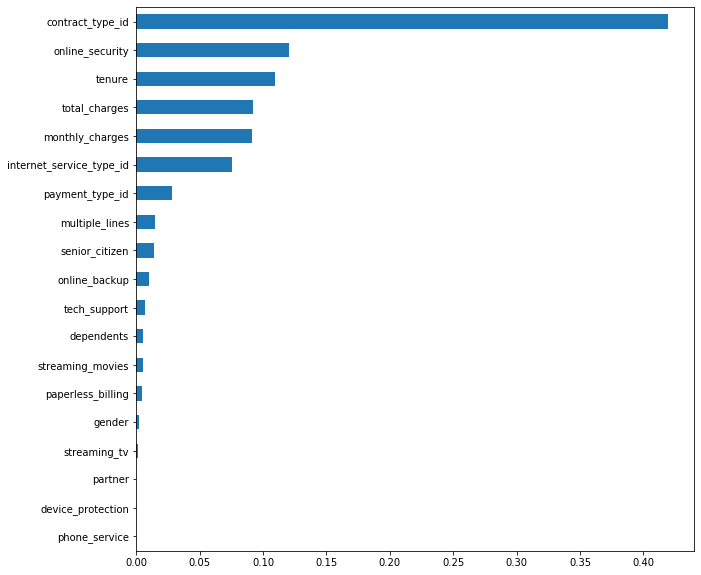

In [46]:
feat_importances.sort_values(ascending=True).plot(kind='barh' , figsize=(10,10)) 

### Create Feature Matrix with just the important features
DF is the name of the prepared dataframe

In [50]:
feat_importances.sort_values(ascending=False)[:5]

contract_type_id    0.419166
online_security     0.120401
tenure              0.109544
total_charges       0.091740
monthly_charges     0.091527
dtype: float64

In [53]:
important_feats = list(feat_importances.sort_values(ascending=False).index[:5])

In [83]:
X = df[important_feats]
y = df['churn']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [85]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [86]:
clf.score(X_train, y_train)

0.813184584178499

In [87]:
clf.score(X_test, y_test)

0.7827733080927591

In [109]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3628
           1       0.70      0.52      0.59      1302

    accuracy                           0.81      4930
   macro avg       0.77      0.72      0.74      4930
weighted avg       0.80      0.81      0.80      4930



In [88]:
y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)

### Decision Tree has lower accuracy, but has less False Negatives. I find it to be a fair traide.

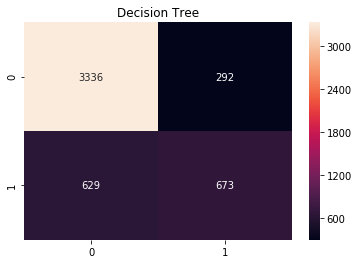

In [89]:
decision_tree_conf_matrix = metrics.confusion_matrix(y_train, y_pred)
sns.heatmap(decision_tree_conf_matrix, annot=True,  fmt='');
title = 'Decision Tree'
plt.title(title);

In [92]:
y_pred_test = clf.predict(X_test)

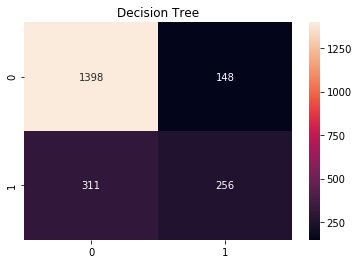

In [93]:
decision_tree_conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
sns.heatmap(decision_tree_conf_matrix, annot=True,  fmt='');
title = 'Decision Tree'
plt.title(title);

# SIDE QUESTIONS

Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point?

If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

In [ ]:
If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable

Controlling for services packages, is the mean monthly_charges of those who have churned significantly 
different from that of those who have not churned? 

In [95]:
df.monthly_charges.mean()

64.7616924605992

In [99]:
churners = df[df['churn'] == 1]
remainers = df[df['churn'] == 0]

In [106]:
churn_distro = churners.monthly_charges

In [107]:
remain_distro = remainers.monthly_charges

In [108]:
stats.ttest_ind(churn_distro, remain_distro)

Ttest_indResult(statistic=16.536738015936308, pvalue=2.7066456068884154e-60)

How much of monthly_charges can be explained by internet_service_type?

State your hypotheses and your conclusion clearly.

How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). 

State your hypotheses and your conclusion clearly.